In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob 
from numpy.linalg import eig

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from typing import List, Set, Dict, Tuple, Optional

%matplotlib inline

In [2]:
#Get adjusting closing prices from each {sector}.csv file
df = pd.concat([pd.read_csv(f, usecols=[0,5], index_col = [0]) for f in glob.glob('*.csv')], ignore_index = True, axis = 1)

In [3]:
#Change column names to sector names
labels = [ f[0:3] for f in glob.glob('*.csv') ]
df.columns = labels

In [10]:
ret.cov()

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,0.000230,0.000178,0.000187,0.000159,0.000139,0.000077,0.000088,0.000101,0.000147
XLE,0.000178,0.000290,0.000175,0.000141,0.000126,0.000074,0.000104,0.000093,0.000126
XLF,0.000187,0.000175,0.000374,0.000188,0.000188,0.000100,0.000106,0.000129,0.000196
XLI,0.000159,0.000141,0.000188,0.000173,0.000153,0.000076,0.000082,0.000105,0.000148
XLK,0.000139,0.000126,0.000188,0.000153,0.000259,0.000067,0.000082,0.000118,0.000154
XLP,0.000077,0.000074,0.000100,0.000076,0.000067,0.000089,0.000060,0.000061,0.000080
XLU,0.000088,0.000104,0.000106,0.000082,0.000082,0.000060,0.000138,0.000065,0.000079
XLV,0.000101,0.000093,0.000129,0.000105,0.000118,0.000061,0.000065,0.000127,0.000107
XLY,0.000147,0.000126,0.000196,0.000148,0.000154,0.000080,0.000079,0.000107,0.000192


In [21]:
A = ret.T@ret/len(ret) 
np.shape(A)

(9, 9)

In [32]:
I = np.eye(*np.shape(A))
np.linalg.det(A-I)

-0.9981276285474179

$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

In [48]:
## Get Eigenvectors and Eigenvalues
def get_eigen(returns: pd.DataFrame) -> Tuple [np.ndarray, np.ndarray]:
    
    eig_vals, eig_vec = eig(returns.cov())
    
    #Sort Eigenvalues (largest to smallest)
    idx = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[idx]
    eig_vec = eig_vec[:,idx]
    return eig_vals, eig_vec

In [49]:
def eig_help(eig_val: np.ndarray) -> Tuple[List, List]:
    x = list(range(eig_val.size))
    y = [val / sum (eig_val) for val in eig_val]
    return x, y

In [1]:
## Plot eigen values (percentage of explained variance) and the cumulative explained variance
eig_val, eig_vec = get_eigen(ret)

x,y = eig_help(eig_val)

plt.figure(figsize =(15,10))
plt.bar(x, y)
plt.plot(np.cumsum(y), color = 'c')
plt.title("Cumalative Explained Variance")

NameError: name 'get_eigen' is not defined

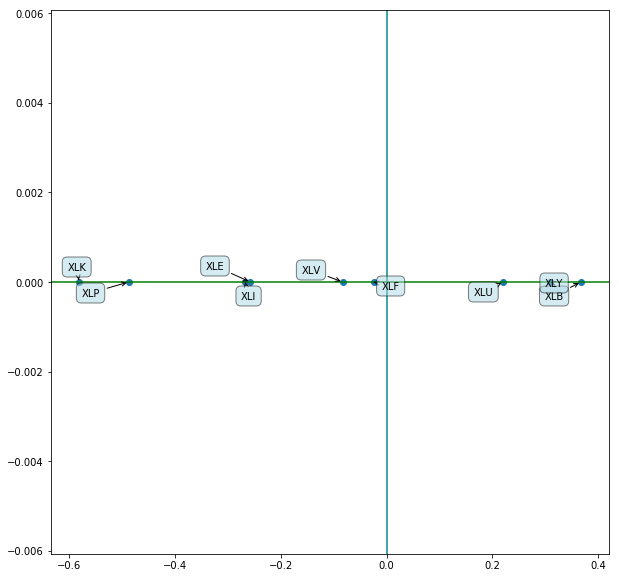

In [52]:
#project eigenvectors in 1-d
y1 = eig_vec[0,:]

plt.figure(figsize =(10,10))
plt.scatter(y1, [0]*9, marker = 'o')
plt.axhline(y = 0, color = 'g')
plt.axvline(x = 0, color = 'darkcyan')

for label, x_, y_ in zip(labels, y1, [0]*9):
    plt.annotate(
        label,
        xy=(x_, y_), xytext=(np.random.randint(low =-30, high =30), np.random.randint(low =-30, high =30)),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

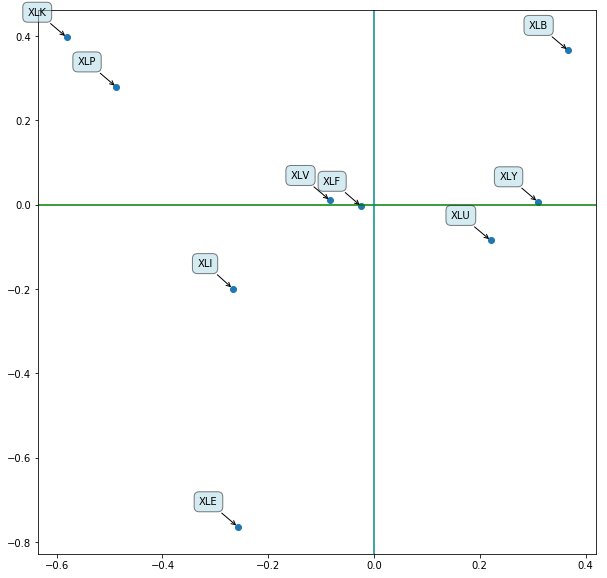

In [50]:
#project eigenvectors in 2-d
y1 = eig_vec[0,:]
y2 = eig_vec[1,:]

plt.figure(figsize =(10,10))
plt.scatter(y1, y2, marker = 'o')
plt.axhline(y = 0, color = 'g')
plt.axvline(x = 0, color = 'darkcyan')

for label, x_, y_ in zip(labels, y1, y2):
    plt.annotate(
        label,
        xy=(x_, y_), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [73]:
## Interactive covariance
def eig_vec_calc(returns, window, start = 0):
    eig_val, _ = get_eigen(returns.iloc[start:start+window,:].cov())
    x,y = eig_help(eig_val)
    plt.figure(figsize =(10,10))
    plt.plot(np.cumsum(y), color = 'c')
    plt.ylim((0,1))
    plt.bar(x, y)
    plt.title('Date: {} - {}'.format(returns.index[start], returns.index[start+window]))

In [74]:

interact(eig_vec_calc, returns = fixed(ret), window = (30,300,10), start = (0,4800,30))

interactive(children=(IntSlider(value=160, description='window', max=300, min=30, step=10), IntSlider(value=0,…

<function __main__.eig_vec_calc(returns, window, start=0)>